# Bin Packing Lab

- Authors:
  - Sevhena Walker, walkes31@mcmaster.ca
  - Mohamad-Hassan Bahsoun, bahsounm@mcmaster.ca
- Group ID on Avenue: group 52
- Gitlab URL: https://gitlab.cas.mcmaster.ca/walkes31/l2-bin-packing

#### Notes about this lab

##### Contribution

- Sevhena: j

- Hassan: It is important to note that Hassan's git push command would not work.

##### Other

- k

## Understand The Code Base

#### Solid Principles
S - In terms of how the code follows the single-responsability principle, each class and function serves one purpose.

O - The design follows the open/closed principle as more components can be added to the code without modifying existing components. This is easily seen in the bin packer design where you have different types of bin packers (offline, online) and there could possibly be more in the future if such a thing was wanted.

L - The design follows the Liskov Substituion principle since all dependent classes can be used in place of their superclasses without any erors occuring. Any overrides seen in the algorithms for the offline and online binpackers do not make any changes to their superclass.

I - This design clearly follows interface segragation by the use of the BinPacker interface/abstract class. This allows for the initalizing of different types of bin packers (offline, online) that have a standardized layout.

D - In the code design there are multiple classes that depend on abstract classes (BinppReader depends on DatasetReader, NextFit has two versions that each depend on an online and offline version of the Binpacker interface) Any changes made to these subclasses won't affect the superclass. If any changes need to be made to any of the methods of the superclasse, then there only need to be an override method initialized in the subclass.

#### Dataset Comprehension

The files found in the prefixed *binpp* folders follow the same format. The first line in each file gives the number *n* of weighted items in the file. The second line gives the max capacity *c* of the bins and the rest of the file is simply the n individual items listed by their respective weights.

The files in the *jburkardt* come in triples with a file ending in *_c*, *_s* and *_w*. The *_c* file gives the capacity of the bins and the *_w* file is the list of items to be packed. The *_s* is the solution file. It refers to the optimal bin configuration, specifically it describes which items should be in each been so that the optimal solution is reached. 

#### Reading jburkardt Files

In [1]:
from macpacking.reader import DatasetReader, JburkardtReader

In [2]:
dataset_c = '_datasets/jburkardt/p04_c.txt'
dataset_s = '_datasets/jburkardt/p04_s.txt'
dataset_w = '_datasets/jburkardt/p04_w.txt'
reader1: DatasetReader = JburkardtReader(dataset_c, dataset_w)
print(f'Dataset: {dataset_c}')
print(f'Dataset: {dataset_w}')
print(f'  - Bin Capacity: {reader1.offline()[0]}')
print(f'  - Objects to pack: {sorted(reader1.offline()[1])}')

Dataset: _datasets/jburkardt/p04_c.txt
Dataset: _datasets/jburkardt/p04_w.txt
  - Bin Capacity: 524
  - Objects to pack: [9, 9, 10, 10, 10, 10, 10, 10, 12, 12, 12, 37, 37, 46, 84, 85, 106, 106, 106, 106, 127, 127, 127, 127, 127, 252, 252, 252, 252, 252, 252, 252, 442]


#### The Worst Bin Packing Algorithm To Ever Exist

In [3]:
from macpacking.model import Online
import macpacking.algorithms.online as online

In [4]:
strategy: Online = online.BadFit()
result = strategy(reader1.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 33
[[9], [9], [10], [10], [10], [10], [10], [10], [12], [12], [12], [37], [37], [46], [84], [85], [106], [106], [106], [106], [127], [127], [127], [127], [127], [252], [252], [252], [252], [252], [252], [252], [442]]


## Implement And Benchmark Algorithms

#### More Data

In [5]:
from macpacking.reader import BinppReader

In [6]:
# dataset = '_datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt'
# reader: DatasetReader = BinppReader(dataset)
# print(f'Dataset: {dataset}')
# print(f'  - Bin Capacity: {reader.offline()[0]}')
# print(f'  - Objects to pack: {sorted(reader.offline()[1])}')

In [7]:
dataset = '_datasets/binpp-hard/HARD0.BPP.txt'
reader: DatasetReader = BinppReader(dataset)
print(f'Dataset: {dataset}')
print(f'  - Bin Capacity: {reader.offline()[0]}')
print(f'  - Objects to pack: {sorted(reader.offline()[1])}')

Dataset: _datasets/binpp-hard/HARD0.BPP.txt
  - Bin Capacity: 100000
  - Objects to pack: [20114, 20226, 20307, 20441, 20496, 20566, 20570, 20616, 20634, 20663, 20664, 20676, 20677, 20686, 20693, 20693, 20813, 20837, 20997, 21060, 21127, 21193, 21315, 21480, 21498, 21557, 21722, 21727, 21784, 21796, 21948, 21950, 22014, 22081, 22134, 22338, 22415, 22432, 22442, 22743, 22942, 22991, 23090, 23178, 23366, 23430, 23453, 23502, 23621, 23663, 23774, 23795, 23837, 23895, 23932, 23952, 23956, 23987, 24332, 24359, 24374, 24457, 24463, 24564, 24592, 24658, 24846, 24852, 25142, 25273, 25324, 25366, 25528, 25530, 25615, 25652, 25688, 25698, 25759, 25906, 25945, 26067, 26133, 26158, 26181, 26192, 26204, 26244, 26368, 26375, 26432, 26550, 26651, 26703, 26795, 26867, 26881, 26935, 27180, 27284, 27349, 27365, 27394, 27425, 27439, 27688, 27765, 27775, 27901, 28020, 28040, 28094, 28160, 28225, 28302, 28305, 28350, 28360, 28703, 28842, 28910, 28921, 28946, 28977, 29038, 29041, 29063, 29094, 29095, 29116,

#### Online Algorithms

In [8]:
from macpacking.model  import Offline
import macpacking.algorithms.offline as offline

##### **Next Fit**

In [17]:
strategy1: Online = online.NextFit()
result1 = strategy1(reader1.online())
count: int = strategy1.counting_compares()
print(f'nb_bins = {len(result1)}')
print(f'{sorted(result1)}')
print(f'Number of comparisons: {count}')

nb_bins = 8
[[10, 252, 127, 106, 10], [46, 12, 127, 10, 12, 252, 10], [85, 37, 252, 10], [106, 84, 252], [127, 37, 106, 127, 106], [252, 10, 9, 127, 12], [252, 252], [442, 9]]
Number of comparisons: 33


##### **First Fit**

In [18]:
strategy2: Online = online.FirstFit()
result2 = strategy2(reader1.online())
count: int = strategy2.counting_compares()
print(f'nb_bins = {len(result2)}')
print(f'{sorted(result2)}')
print(f'Number of comparisons: {count}')

nb_bins = 8
[[10, 37, 106, 127, 106, 46, 12, 10, 9, 37, 10, 10], [85, 252, 127], [127, 84, 252], [127, 252, 106, 9, 12], [252], [252, 127, 106, 10, 12, 10], [252, 252], [442]]
Number of comparisons: 88


##### **Refined First Fit**

In [33]:
strategy: Online = online.RefinedFirstFit()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 9
[[10, 106, 46, 12, 127, 12, 10, 9, 106, 84], [85], [127, 37, 10, 10, 9, 127, 12], [127, 106, 10, 127, 37, 106, 10], [252], [252, 252], [252, 252], [252, 252], [442]]


##### **Best Fit**

In [36]:
strategy: Online = online.BestFit()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 8
[[10, 252, 127, 106, 10, 10, 9], [37, 12, 252, 10, 106, 84, 10, 10], [127, 106, 127, 106, 46, 12], [127, 252, 85, 37, 9, 12], [252], [252, 127], [252, 252], [442]]


##### **Worst Fit**

In [38]:
strategy: Online = online.WorstFit()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 8
[[10, 252, 127, 106, 10, 12], [37, 10, 12, 252, 10, 85, 12], [127, 9, 106, 84, 37, 10, 9, 127], [127, 106, 127, 106, 46], [252], [252, 10, 252], [252, 252], [442]]


#### Offline Algorithms

##### **Ben Maier Fit**

In [12]:
import macpacking.algorithms.baseline as baseline

strategy: Offline = baseline.BenMaier()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 59
[[20441, 20307, 20226, 20114], [20616, 20570, 20566, 20496], [20677, 20676, 20664, 20663], [20813, 20693, 20693, 20686], [21193, 21060, 20997, 20837], [21722, 21557, 21498, 21480], [21950, 21948, 21784, 21727], [22338, 22134, 22081, 22014], [22942, 22743, 22432, 22415], [23430, 23366, 23178, 23090], [23774, 23663, 23621, 23453], [23932, 23895, 23837, 23795], [24359, 24332, 23956, 23952], [24564, 24463, 24457, 24374], [24852, 24846, 24658, 24592], [25324, 25273, 25142, 23987], [25530, 25528, 25366, 23502], [25688, 25652, 25615, 22991], [25906, 25759, 25698, 22442], [26133, 26067, 25945, 21796], [26192, 26181, 26158, 21315], [26368, 26244, 26204, 21127], [26550, 26432, 26375, 20634], [26795, 26703, 26651], [26935, 26881, 26867], [27349, 27284, 27180], [27425, 27394, 27365], [27765, 27688, 27439], [28020, 27901, 27775], [28160, 28094, 28040], [28305, 28302, 28225], [28703, 28360, 28350], [28921, 28910, 28842], [29038, 28977, 28946], [29094, 29063, 29041], [29117, 29116, 29095

##### **Next Fit Decreasing**

In [14]:
strategy3: Offline = offline.NextFit()
result3 = strategy3(reader.offline())
print(f'nb_bins = {len(result3)}')
print(f'{sorted(result3)}')

nb_bins = 65
[[20114], [20496, 20441, 20307, 20226], [20634, 20616, 20570, 20566], [20677, 20676, 20664, 20663], [20813, 20693, 20693, 20686], [21127, 21060, 20997, 20837], [21498, 21480, 21315, 21193], [21784, 21727, 21722, 21557], [22014, 21950, 21948, 21796], [22415, 22338, 22134, 22081], [22942, 22743, 22442, 22432], [23366, 23178, 23090, 22991], [23621, 23502, 23453, 23430], [23837, 23795, 23774, 23663], [23956, 23952, 23932, 23895], [24374, 24359, 24332, 23987], [24592, 24564, 24463, 24457], [25142, 24852, 24846, 24658], [25366, 25324, 25273], [25615, 25530, 25528], [25698, 25688, 25652], [25945, 25906, 25759], [26158, 26133, 26067], [26204, 26192, 26181], [26375, 26368, 26244], [26651, 26550, 26432], [26867, 26795, 26703], [27180, 26935, 26881], [27365, 27349, 27284], [27439, 27425, 27394], [27775, 27765, 27688], [28040, 28020, 27901], [28225, 28160, 28094], [28350, 28305, 28302], [28842, 28703, 28360], [28946, 28921, 28910], [29041, 29038, 28977], [29095, 29094, 29063], [29123,

##### **First Fit Decreasing**

In [12]:
strategy4: Offline = offline.FirstFitDecreasing()
result4 = strategy4(reader.offline())
print(f'nb_bins = {len(result4)}')
print(f'{sorted(result4)}')

nb_bins = 60
[[20307], [20616, 20226, 20114], [20676, 20570, 20566, 20441], [20693, 20664, 20663, 20634], [21060, 20693, 20686, 20677], [21557, 20997, 20837, 20813], [21796, 21498, 21480, 21193], [22134, 21784, 21727, 21722], [22743, 22081, 22014, 21948], [23366, 22432, 22415, 22338], [23663, 23178, 22991, 22942], [23895, 23502, 23453, 23430], [23987, 23837, 23795, 23774], [24457, 23956, 23952, 23932], [24846, 24374, 24359, 24332], [25273, 24658, 24592, 24564], [25528, 25142, 24852, 24463], [25652, 25366, 25324, 23621], [25759, 25615, 25530, 23090], [26067, 25698, 25688, 22442], [26181, 25945, 25906, 21950], [26244, 26158, 26133, 21315], [26432, 26204, 26192, 21127], [26703, 26375, 26368, 20496], [26881, 26651, 26550], [27284, 26867, 26795], [27394, 27180, 26935], [27688, 27365, 27349], [27901, 27439, 27425], [28094, 27775, 27765], [28302, 28040, 28020], [28360, 28225, 28160], [28910, 28350, 28305], [28977, 28842, 28703], [29063, 28946, 28921], [29116, 29041, 29038], [29173, 29095, 290

##### **Best Fit Decreasing**

In [19]:
strategy: Offline = offline.BestFitDecreasing()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 60
[[20307], [20616, 20226, 20114], [20676, 20570, 20566, 20441], [20693, 20664, 20663, 20634], [21060, 20693, 20686, 20677], [21557, 20997, 20837, 20813], [21796, 21498, 21480, 21193], [22134, 21784, 21727, 21722], [22743, 22081, 22014, 21948], [23366, 22432, 22415, 22338], [23663, 23178, 22991, 22942], [23895, 23502, 23453, 23430], [23987, 23837, 23795, 23774], [24457, 23956, 23952, 23932], [24846, 24374, 24359, 24332], [25273, 24658, 24592, 24564], [25528, 25142, 24852, 24463], [25652, 25366, 25324, 23621], [25759, 25615, 25530, 23090], [26067, 25698, 25688, 22442], [26181, 25945, 25906, 21950], [26244, 26158, 26133, 21315], [26432, 26204, 26192, 21127], [26703, 26375, 26368, 20496], [26881, 26651, 26550], [27284, 26867, 26795], [27394, 27180, 26935], [27688, 27365, 27349], [27901, 27439, 27425], [28094, 27775, 27765], [28302, 28040, 28020], [28360, 28225, 28160], [28910, 28350, 28305], [28977, 28842, 28703], [29063, 28946, 28921], [29116, 29041, 29038], [29173, 29095, 290

##### **Worst Fit Decreasing**

In [31]:
strategy: Offline = offline.WorstFitDecreasing()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 4
[[33], [50, 33, 3], [60, 33], [70, 11, 7]]


#### **KPIs**

From the results of the previous section, we can see that many algorithms find the optimal and/or same number of bins. To compare them in more depth, we came up with 3 different KPIs.

The first was to count the number of comparisons the algorithms need to pack all the items. This helped to evaluate the actual complexity of the algorithm.

In [19]:
count: int = strategy1.counting_compares()
print(f'nb_bins = {len(result1)}')
print(f'{sorted(result1)}')
print(f'Number of comparisons: {count}\n')

count: int = strategy2.counting_compares()
print(f'nb_bins = {len(result2)}')
print(f'{sorted(result2)}')
print(f'Number of comparisons: {count}')

nb_bins = 8
[[10, 252, 127, 106, 10], [46, 12, 127, 10, 12, 252, 10], [85, 37, 252, 10], [106, 84, 252], [127, 37, 106, 127, 106], [252, 10, 9, 127, 12], [252, 252], [442, 9]]
Number of comparisons: 33

nb_bins = 8
[[10, 37, 106, 127, 106, 46, 12, 10, 9, 37, 10, 10], [85, 252, 127], [127, 84, 252], [127, 252, 106, 9, 12], [252], [252, 127, 106, 10, 12, 10], [252, 252], [442]]
Number of comparisons: 88


As an example, we can compare the online NextFit (first) and FirstFit (second) on the p04 dataset and notice that while both algorithms find the optimal solution, NextFit has a much better time complexity.

The next KPI measures the amount of space that was wasted in the packing of this bins. This not necessarily useful for algorithms that ouput the same number of bins, but it does give a different view on the performance of the algorithm.

In [20]:
from kpis import wasted_space, weight_distribution

print(f'Bin space not used: {wasted_space(reader.offline()[0], result)}\n')

Bin space not used: 559718



Finally, the last KPI is certainly very useful for comparing algorithms that give the same result. It compares the distribution of the weights in the bins. We can argue that the more even distribution is better as that means the algorithm is truly trying to pack the items with the least amount of space wasted.

Weight Distribution: [505, 503, 469, 451, 442, 384, 410, 504]



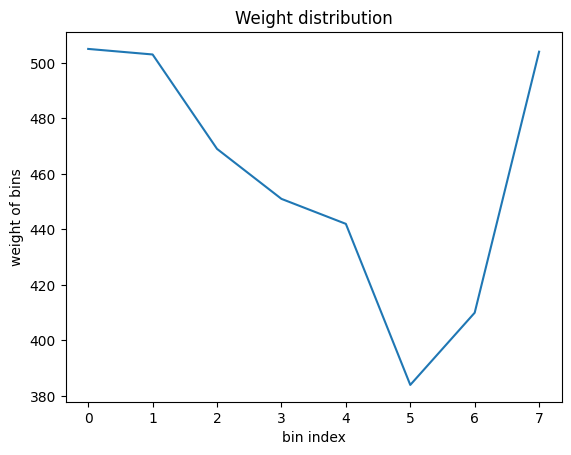

Weight Distribution: [517, 520, 506, 463, 442, 464, 504, 252]



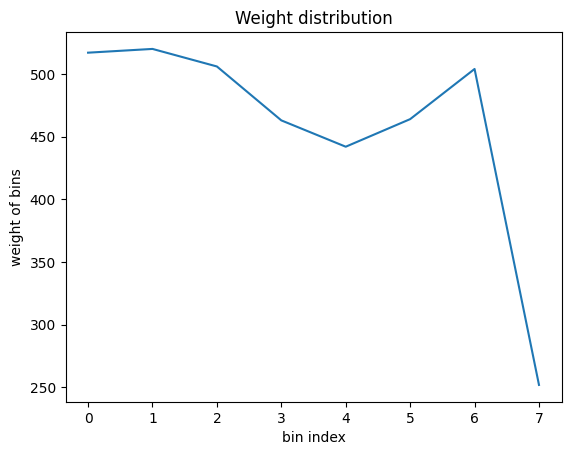

In [52]:
weight_distribution(result1)
weight_distribution(result2)

From the graphs above, we can clearly see the space that was wasted that could potentially have saved the use of a bin.

#### **Benchmarking For Classical Algorithms**

In [53]:
from pyperf import BenchmarkSuite
from os.path import exists

bench_datafile = 'outputs/classic_bench.json'
if not exists(bench_datafile):
    raise UserWarning('You must execute the benchmark before exploring the results!')

In [54]:
!{'python -m pyperf hist outputs/classic_bench.json'}

N4C2W2_A.BPP.txt offline NF_Off

159 us: 11 ####################################
163 us: 21 ####################################################################
167 us: 10 ################################
171 us:  4 #############
175 us:  4 #############
179 us:  2 ######
183 us:  1 ###
187 us:  2 ######
191 us:  4 #############
195 us:  0 |
199 us:  0 |
203 us:  0 |
207 us:  0 |
211 us:  0 |
215 us:  0 |
219 us:  0 |
223 us:  0 |
227 us:  0 |
231 us:  0 |
235 us:  0 |
239 us:  0 |
243 us:  1 ###

N4C2W2_A.BPP.txt offline FFDesc

9.67 ms:  1 #######
9.84 ms:  8 ######################################################
10.0 ms: 10 ###################################################################
10.2 ms:  6 ########################################
10.3 ms:  7 ###############################################
10.5 ms:  1 #######
10.7 ms:  4 ###########################
10.8 ms:  8 ######################################################
11.0 ms:  1 #######
11.1 ms:  2 #############
11.3 ms:  3

In [55]:
def extract_benchmark_algos(file: str) -> set[str]:
    suite = BenchmarkSuite.load(file)
    context = suite.get_benchmark_names()
    return set(map(lambda c: c.split('-')[0], context))

In [57]:
files = extract_benchmark_algos(bench_datafile)

In [58]:
def load_bench_measurements(name: str, json_filename: str) -> list[float]:
    """extract the values for a given benchmark"""
    suite = BenchmarkSuite.load(json_filename)
    bench = suite.get_benchmark(name)
    return list(bench.get_values())

In [61]:
Next_Fit_off_vals = []; Next_Fit_on_vals = []
First_Fit_off_vals = []; First_Fit_on_vals = []
RFF_on_vals = []
Best_Fit_off_vals = []; Best_Fit_on_vals = []
Worst_Fit_off_vals = []; Worst_Fit_on_vals = []
baseline_vals = []

In [64]:
for file in files:
    #print(file)
    name = file.split()[2]
    #print(name)
    match name:
        case 'NF_Off':
            Next_Fit_off_vals += load_bench_measurements(file, bench_datafile)
        case 'NF_On':
            Next_Fit_on_vals += load_bench_measurements(file, bench_datafile)
        case 'FFDesc':
            First_Fit_off_vals += load_bench_measurements(file, bench_datafile)
        case 'FF':
            First_Fit_on_vals += load_bench_measurements(file, bench_datafile)
        case 'RFF':
            RFF_on_vals += load_bench_measurements(file, bench_datafile)
        case 'BFDesc':
            Best_Fit_off_vals += load_bench_measurements(file, bench_datafile)
        case 'BF':
            Best_Fit_on_vals += load_bench_measurements(file, bench_datafile)
        case 'WFDesc':
            Worst_Fit_off_vals += load_bench_measurements(file, bench_datafile)
        case 'WF':
            Worst_Fit_on_vals += load_bench_measurements(file, bench_datafile)
        case 'BenMaier':
            baseline_vals += load_bench_measurements(file, bench_datafile)
        case _:
            raise ValueError(name)

#### **Plot the Benchmark**

In [82]:
from matplotlib import pyplot as plt

def draw_hist(values: list[float], title: str, canvas):
    canvas.set_title(title)
    canvas.set(xlabel='exec time (s)', ylabel='|instances|')
    canvas.hist(values, 20) # putting values into 10 beans

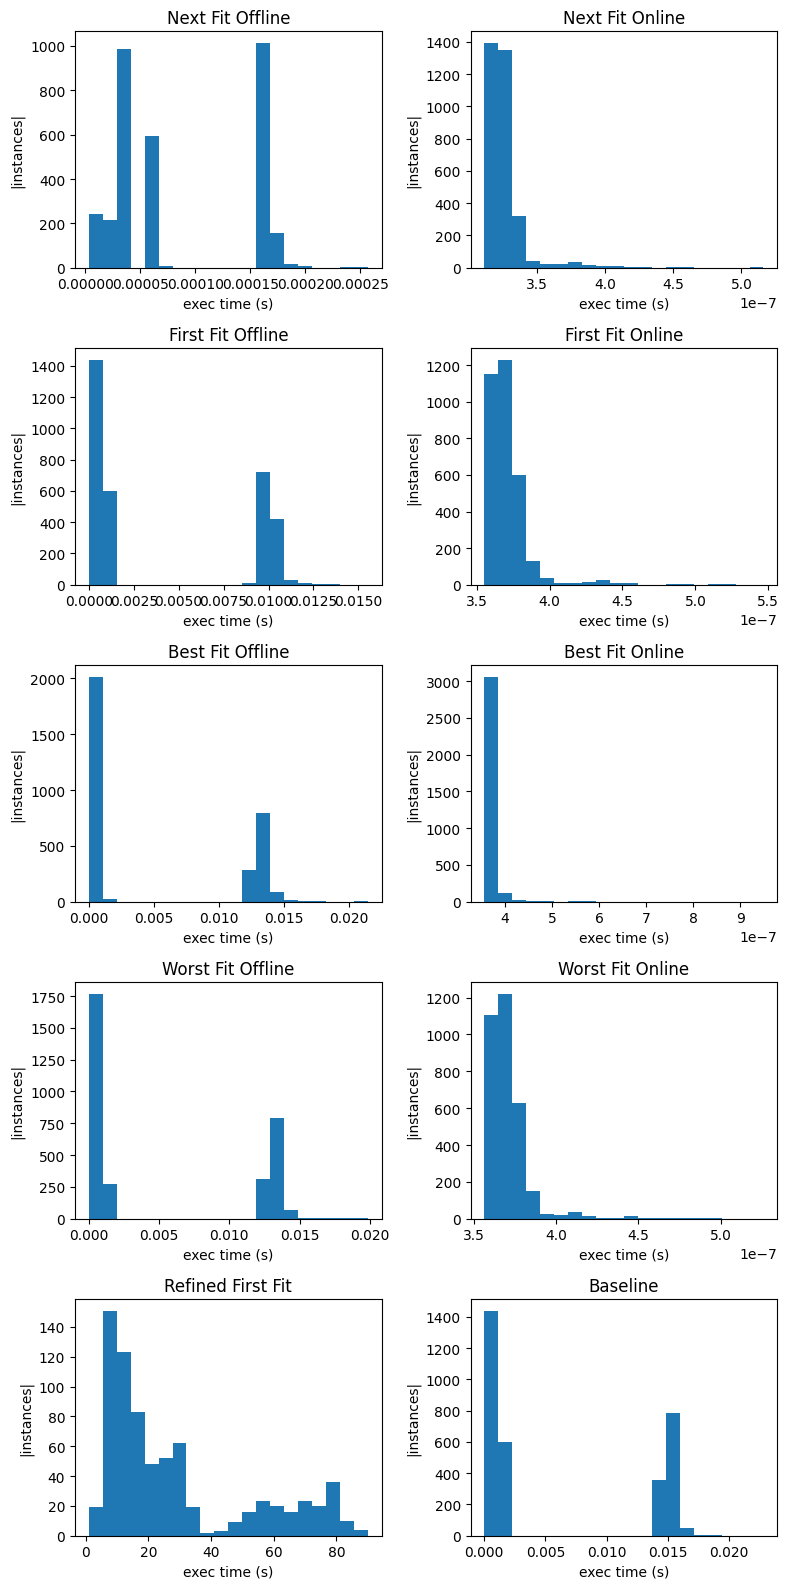

In [83]:
fig, axes = plt.subplots(5,2, sharex = False, sharey= False)
draw_hist(Next_Fit_off_vals, "Next Fit Offline", axes[0, 0]) 
draw_hist(Next_Fit_on_vals, "Next Fit Online", axes[0, 1]) 
draw_hist(First_Fit_off_vals, "First Fit Offline", axes[1, 0])
draw_hist(First_Fit_on_vals, "First Fit Online", axes[1, 1])
draw_hist(Best_Fit_off_vals, "Best Fit Offline", axes[2, 0])
draw_hist(Best_Fit_on_vals, "Best Fit Online", axes[2, 1])
draw_hist(Worst_Fit_off_vals, "Worst Fit Offline", axes[3, 0])
draw_hist(Worst_Fit_on_vals, "Worst Fit Online", axes[3, 1])
draw_hist(RFF_on_vals, "Refined First Fit", axes[4, 0])
draw_hist(baseline_vals, "Baseline", axes[4, 1])
fig.set_size_inches(8,16)
fig.tight_layout()
fig.savefig('outputs/histogram_classic.pdf')

In [67]:
def plot_box(values: list[float], names: str, canvas):
    canvas.boxplot(values, notch=True, labels=names)

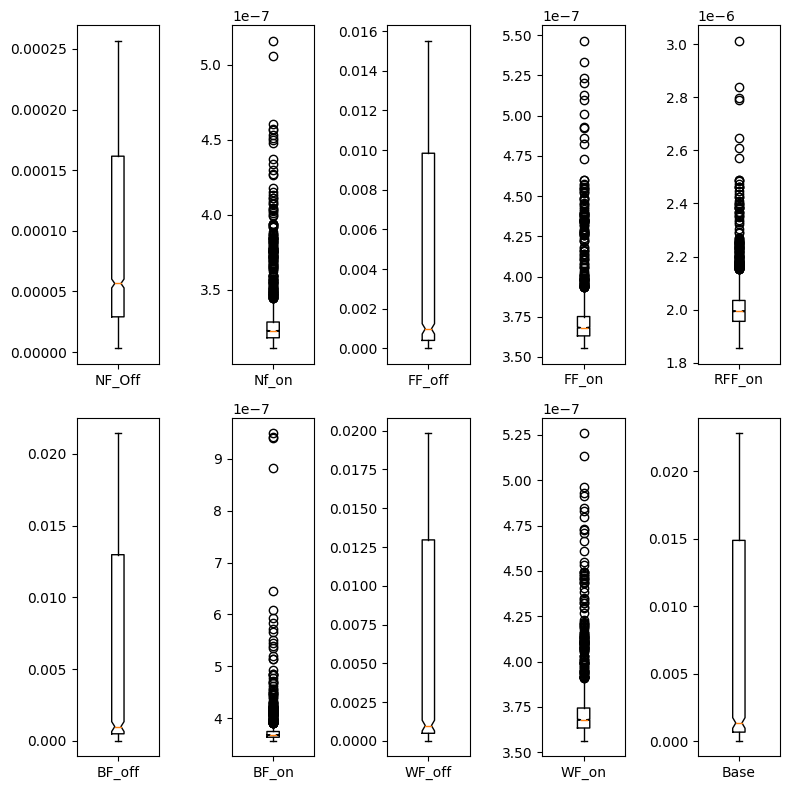

In [68]:
fig, ax = plt.subplots(2,5)

plot_box([Next_Fit_off_vals],['NF_Off'], ax[0, 0])
plot_box([Next_Fit_on_vals],['Nf_on'], ax[0, 1])
plot_box([First_Fit_off_vals],['FF_off'], ax[0, 2])
plot_box([First_Fit_on_vals],['FF_on'], ax[0, 3])
plot_box([RFF_on_vals],['RFF_on'], ax[0, 4])
plot_box([Best_Fit_off_vals],['BF_off'], ax[1, 0])
plot_box([Best_Fit_on_vals],['BF_on'], ax[1, 1])
plot_box([Worst_Fit_off_vals],['WF_off'], ax[1, 2])
plot_box([Worst_Fit_on_vals],['WF_on'], ax[1, 3])
plot_box([baseline_vals],['Base'], ax[1, 4])

fig.set_size_inches(8,8)
fig.tight_layout()
fig.savefig('outputs/boxplot_classic.pdf')

#### **Analysis**

The benchmark was executed over the binpp/N4C2W2, binpp/N2C3W4, binpp-hard and jburkardt dataset directories. The goal was to run the benchmark over a large variety of data, with different cpacities and weights, so as to make sure that the algorithms could be evaluated without fear of data bias.

At first glance, you can immediately see the difference between execution times of the offline and online algorithms. The execution time axes for box the histogram and box plot have a magnitude of 1e-7 for online algorithms or 1e-6 for refined first fit specifically. The offline algorithms on the other hand have exexution times with magnitudes of 1e-2 or 1-4 for next fit offline specifically. Online algorithms are therefore much faster than their offline versions.

To go in detail, it can be seen that Next Fit (NF) online has the best average execution time out of all the algorithms. This makes sense, since it is the only one of the online algorithms with a time complexity of O(n). NF online only ever has 1 bin open at a time and does not need to reiterate over all the bins for every item. 

First fit (FF) online has a more variable time complexity which it allows it to be the second fastest. In the best case where every item fits in the first bin, FF online has the same time complexity of NF online: O(n). This is rather unlikely unless the capacity of the bins is big enough to fit all the items. It is however possible for certain items which explains its edge over the other algorithms. In the worst case, each bin can only fit 1 item which means it will have to iterate over all the open bins for each items giving it a time complexity of O(m x n). 

Best fit (BF) online and worst fit (WF) online have the second worst time complexities out of all the algorithms. This is due to the fact that for each item they *must* iterate over all open bins meaning that their time complexitites is a constant O(m x n). The only factor that could help their would be a larger capacity per bin meaning that the algorithm would not need to open as many bins. It should be noted that the results of the benchmark place the execution time of WF online almost equal to FF online, though the reason for that is not known.

Last for online algorithms is refined first fit, the pieces must be classified first. Afterwards, the algorithm behaves like FF online. The time complexity is therefore FF online's time complexity + O(n), in all cases.

The offline algorithms have a larger execution time simply because they are sorted prior to being passed to their online counterparts. Therefore, for each offline algorithm, its time complexity is the online version + (O(n) in the best case or O(n log n) for every other case).

In the code for offline algorithms, since all items are known in advance, all items are sorted from largest to smallest 

## Measure Improvement Margin

In [69]:
from os.path import exists
from statistics import median, quantiles
from json import load

datafile = 'outputs/optimal_vals.json'
if not exists(bench_datafile):
    raise UserWarning('You must execute the benchmark before exploring the results!')

In [70]:
data = None

with open(datafile, 'r') as openfile:
    data = load(openfile)

In [71]:
NF_off_vals = []; NF_on_vals = []
FF_off_vals = []; FF_on_vals = []
RFF_on_vals = [4,5,3,5,6]
BF_off_vals = []; BF_on_vals = []
WF_off_vals = []; WF_on_vals = []
BenMaier_vals = []

In [72]:
for name in data.keys():
    match name.split()[1]:
        case 'NF_Off':
            NF_off_vals.append(data[name])
        case 'NF_On':
            NF_on_vals.append(data[name])
        case 'FFDesc':
            FF_off_vals.append(data[name])
        case 'FF':
            FF_on_vals.append(data[name])
        case 'RFF':
            RFF_on_vals.append(data[name])
        case 'BFDesc':
            BF_off_vals.append(data[name])
        case 'BF':
            BF_on_vals.append(data[name])
        case 'WFDesc':
            WF_off_vals.append(data[name])
        case 'WF':
            WF_on_vals.append(data[name])
        case 'BenMaier':
            BenMaier_vals.append(data[name])
        case _:
            raise ValueError(data[name])

In [73]:
def draw_hist(values: list[float], title: str, canvas):
    canvas.set_title(title)
    canvas.set(xlabel='bin diff (s)', ylabel='|instances|')
    canvas.hist(values, 20) # putting values into 10 beans

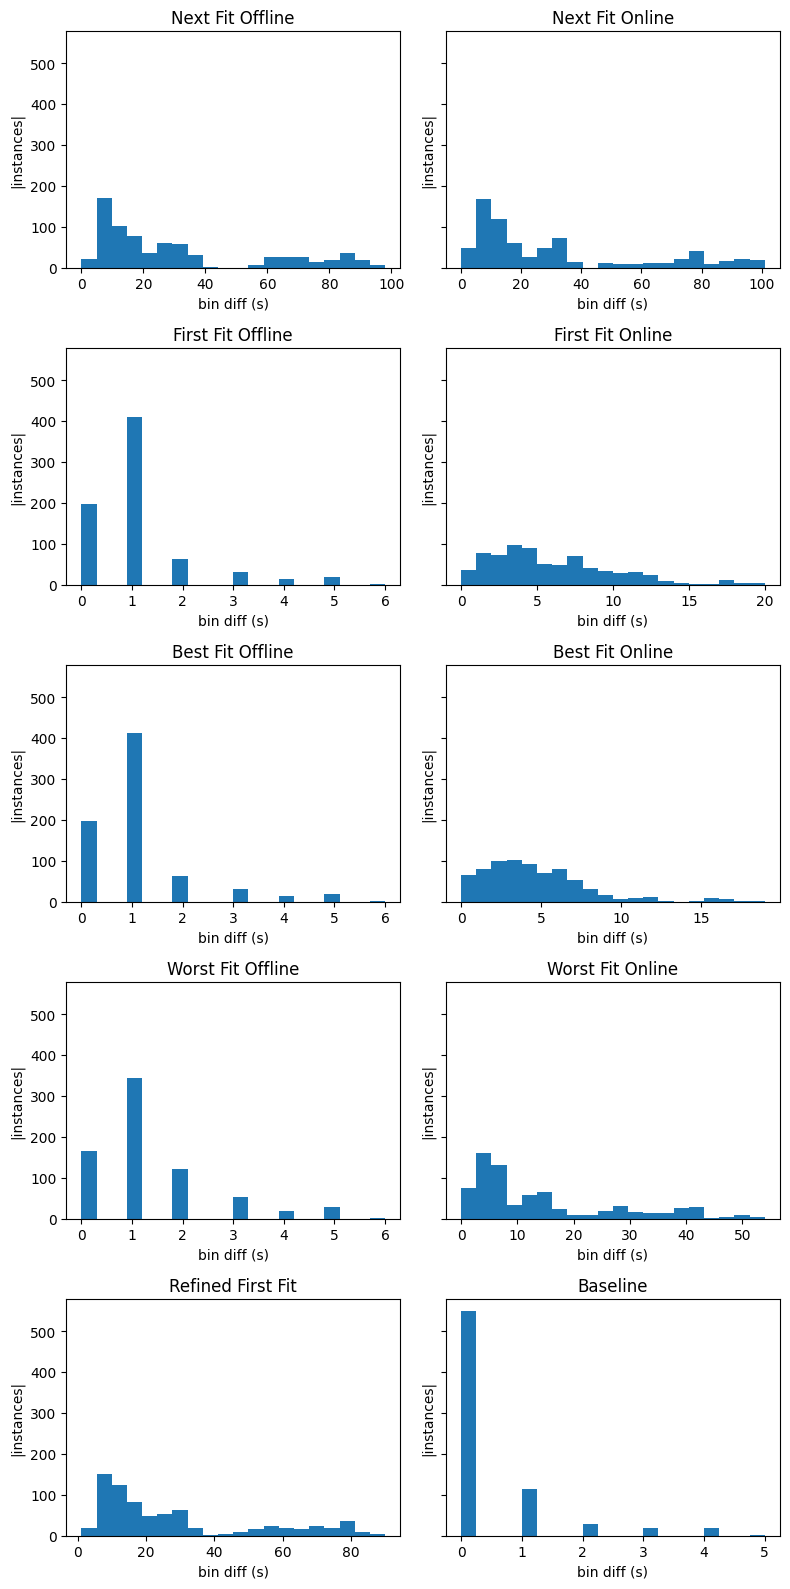

In [74]:
fig, axes = plt.subplots(5,2, sharex = False, sharey= True)
draw_hist(NF_off_vals, "Next Fit Offline", axes[0, 0]) 
draw_hist(NF_on_vals, "Next Fit Online", axes[0, 1]) 
draw_hist(FF_off_vals, "First Fit Offline", axes[1, 0])
draw_hist(FF_on_vals, "First Fit Online", axes[1, 1])
draw_hist(BF_off_vals, "Best Fit Offline", axes[2, 0])
draw_hist(BF_on_vals, "Best Fit Online", axes[2, 1])
draw_hist(WF_off_vals, "Worst Fit Offline", axes[3, 0])
draw_hist(WF_on_vals, "Worst Fit Online", axes[3, 1])
draw_hist(RFF_on_vals, "Refined First Fit", axes[4, 0])
draw_hist(BenMaier_vals, "Baseline", axes[4, 1])
fig.set_size_inches(8,16)
fig.tight_layout()
fig.savefig('outputs/histogram_optimal.pdf')

In [75]:
def plot_box(values: list[float], names: str, canvas):
    canvas.boxplot(values, notch=True, labels=names)

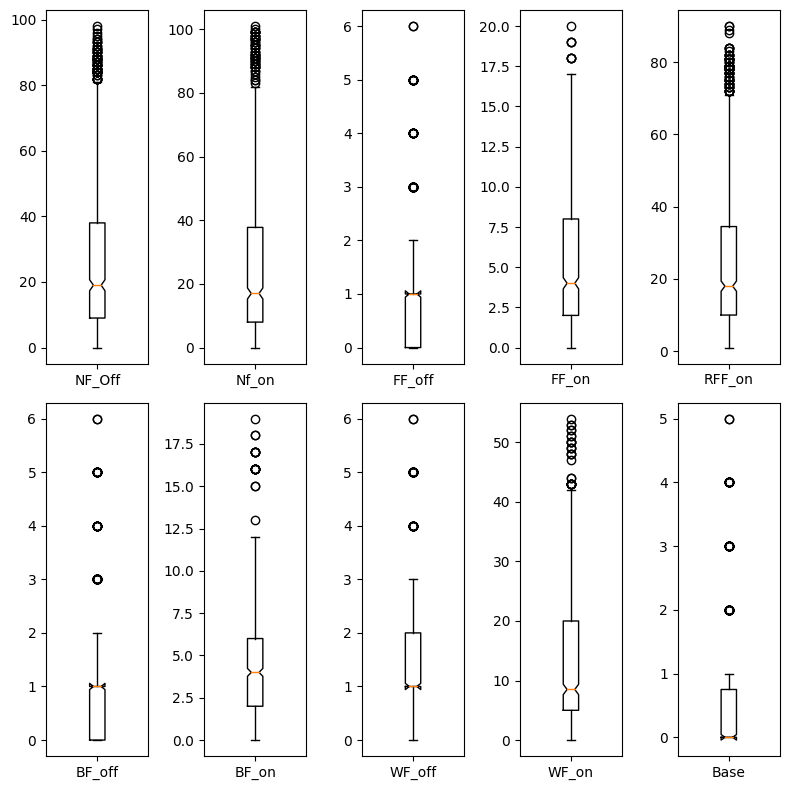

In [76]:
fig, ax = plt.subplots(2,5)

plot_box([NF_off_vals],['NF_Off'], ax[0, 0])
plot_box([NF_on_vals],['Nf_on'], ax[0, 1])
plot_box([FF_off_vals],['FF_off'], ax[0, 2])
plot_box([FF_on_vals],['FF_on'], ax[0, 3])
plot_box([RFF_on_vals],['RFF_on'], ax[0, 4])
plot_box([BF_off_vals],['BF_off'], ax[1, 0])
plot_box([BF_on_vals],['BF_on'], ax[1, 1])
plot_box([WF_off_vals],['WF_off'], ax[1, 2])
plot_box([WF_on_vals],['WF_on'], ax[1, 3])
plot_box([BenMaier_vals],['Base'], ax[1, 4])

fig.set_size_inches(8,8)
fig.tight_layout()
fig.savefig('outputs/boxplot_optimal.pdf')

In [77]:
def outlier_vals(data):
    values = data
    q1 = quantiles(values, method='inclusive')[0]
    
    # finding the 3rd quartile
    q3 = quantiles(values, method='inclusive')[2]
    med = median(values)
    
    # finding the iqr region
    iqr = q3-q1
    
    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    return (upper_bound, lower_bound)

Above code structure from: https://www.geeksforgeeks.org/finding-the-outlier-points-from-matplotlib/

In [78]:
NF_off_outliers = []; NF_on_outliers = []
FF_off_outliers = []; FF_on_outliers = []; RFF_outliers = []
BF_off_outliers = []; BF_on_outliers = []
WF_off_outliers = []; WF_on_outliers = []
BenMaier_outliers = []

all_outliers = set()

NF_off_bounds = outlier_vals(NF_off_vals); NF_on_bounds = outlier_vals(NF_on_vals)
FF_off_bounds = outlier_vals(FF_off_vals); FF_on_bounds = outlier_vals(FF_on_vals); RFF_bounds = outlier_vals(RFF_on_vals)
BF_off_bounds = outlier_vals(BF_off_vals); BF_on_bounds = outlier_vals(BF_on_vals)
WF_off_bounds = outlier_vals(WF_off_vals); WF_on_bounds = outlier_vals(WF_on_vals)
BenMaier_bounds = outlier_vals(BenMaier_vals)

In [79]:
for name in data.keys():
    val = data[name]
    if val < 10:
        continue
    match name.split()[1]:
        case 'NF_Off':
            if val > NF_off_bounds[0] or val < NF_off_bounds[1]:
                NF_off_outliers.append(name.split()[0])
                all_outliers.add(name.split()[0])
        case 'NF_On':
            if val > NF_on_bounds[0] or val < NF_on_bounds[1]:
                NF_on_outliers.append(name.split()[0])
                all_outliers.add(name.split()[0])
        case 'FFDesc':
            if val > FF_off_bounds[0] or val < FF_off_bounds[1]:
                FF_off_outliers.append(name.split()[0])
                all_outliers.add(name.split()[0])
        case 'FF':
            if val > FF_on_bounds[0] or val < FF_on_bounds[1]:
                FF_on_outliers.append(name.split()[0])
                all_outliers.add(name.split()[0])
        case 'RFF':
            if val > RFF_bounds[0] or val < RFF_bounds[1]:
                RFF_outliers.append(name.split()[0])
                all_outliers.add(name.split()[0])
        case 'BFDesc':
            if val > BF_off_bounds[0] or val < BF_off_bounds[1]:
                BF_off_outliers.append(name.split()[0])
                all_outliers.add(name.split()[0])
        case 'BF':
            if val > BF_on_bounds[0] or val < BF_on_bounds[1]:
                BF_on_outliers.append(name.split()[0])
                all_outliers.add(name.split()[0])
        case 'WFDesc':
            if val > WF_off_bounds[0] or val < WF_off_bounds[1]:
                WF_off_outliers.append(name.split()[0])
                all_outliers.add(name.split()[0])
        case 'WF':
            if val > WF_on_bounds[0] or val < WF_on_bounds[1]:
                WF_on_outliers.append(name.split()[0])
                all_outliers.add(name.split()[0])
        case 'BenMaier':
            if val > BenMaier_bounds[0] or val < BenMaier_bounds[1]:
                BenMaier_outliers.append(name.split()[0])
                all_outliers.add(name.split()[0])
        case _:
            raise ValueError(data[name])

In [84]:
print(f'All outliers: {sorted(all_outliers)}\n')
# print(f'Next Fit offline outliers: {sorted(NF_off_outliers)}\n')
# print(f'Next Fit online outliers: {sorted(NF_on_outliers)}\n')
# print(f'First Fit offline outliers: {sorted(FF_off_outliers)}\n')
# print(f'First Fit online outliers: {sorted(FF_on_outliers)}\n')
# print(f'Refined First Fit outliers: {sorted(RFF_outliers)}\n')
# print(f'Best Fit offline outliers: {sorted(BF_off_outliers)}\n')
# print(f'Best Fit online outliers: {sorted(BF_on_outliers)}\n')
# print(f'Worst Fit offline outliers: {sorted(WF_off_outliers)}\n')
# print(f'Worst Fit online outliers: {sorted(WF_on_outliers)}\n')
# print(f'Baseline outliers: {sorted(BenMaier_outliers)}')

All outliers: ['N4C1W1_B.BPP.txt', 'N4C1W1_F.BPP.txt', 'N4C1W1_R.BPP.txt', 'N4C1W2_A.BPP.txt', 'N4C1W2_B.BPP.txt', 'N4C1W2_C.BPP.txt', 'N4C1W2_D.BPP.txt', 'N4C1W2_E.BPP.txt', 'N4C1W2_F.BPP.txt', 'N4C1W2_G.BPP.txt', 'N4C1W2_H.BPP.txt', 'N4C1W2_I.BPP.txt', 'N4C1W2_J.BPP.txt', 'N4C1W2_K.BPP.txt', 'N4C1W2_L.BPP.txt', 'N4C1W2_N.BPP.txt', 'N4C1W2_O.BPP.txt', 'N4C1W2_P.BPP.txt', 'N4C1W2_Q.BPP.txt', 'N4C1W2_R.BPP.txt', 'N4C1W2_S.BPP.txt', 'N4C1W2_T.BPP.txt', 'N4C2W1_B.BPP.txt', 'N4C2W1_H.BPP.txt', 'N4C2W1_I.BPP.txt', 'N4C2W1_L.BPP.txt', 'N4C2W1_M.BPP.txt', 'N4C2W1_N.BPP.txt', 'N4C2W1_O.BPP.txt', 'N4C2W1_P.BPP.txt', 'N4C2W1_S.BPP.txt', 'N4C2W2_A.BPP.txt', 'N4C2W2_B.BPP.txt', 'N4C2W2_C.BPP.txt', 'N4C2W2_D.BPP.txt', 'N4C2W2_E.BPP.txt', 'N4C2W2_F.BPP.txt', 'N4C2W2_G.BPP.txt', 'N4C2W2_H.BPP.txt', 'N4C2W2_I.BPP.txt', 'N4C2W2_J.BPP.txt', 'N4C2W2_K.BPP.txt', 'N4C2W2_L.BPP.txt', 'N4C2W2_M.BPP.txt', 'N4C2W2_N.BPP.txt', 'N4C2W2_O.BPP.txt', 'N4C2W2_P.BPP.txt', 'N4C2W2_Q.BPP.txt', 'N4C2W2_R.BPP.txt', 'N4C2

#### Analysis

We decided to measure the imporvement margin in a continuous manner by calculating how many more bins did the algorithm use to pack the bins compared to the optimal. This was done using all the data provided.

Histograms and boxplots were used once again as they offer a simple way to view the distribution of the data. In the histograms, we can easily see how consistent an algorithm is across many datasets, meaning if an algorithm consistently finds a solution close to the optimal no matter the data or if the data itself determines the result. The boxplots gave an even more direct view on the outlier data points and actual calculations revealed that the data found in the binpp/N4* directories gave the most problems.

Both Next Fit algorithms performaned similarily badly, which makes sense given that they never seek to "fill the gaps" so a lot of space gets wasted. 

All the other algorithms performed better due to their "fill the gaps" nature. However, there is a marked difference between the offline and online algorithms performance. Since all items are known in an offline algorithm, the items can be sorted from largest to smallest. As the biggest items are placed first, most bins are only opened by necessity and the smaller items that come last can top up the bins, wasting much less space than the offline algorithms.

## T4: Add Smarter Algorithms - Analysis

## From Fixed Capacity to Fixed Bins

#### Multiway Algorithms

In [9]:
from macpacking.model import Multiway
import macpacking.algorithms.baseline as baseline
import macpacking.algorithms.multiway as multiway

In [10]:
numbins = 15

##### **Baseline**

In [16]:
strategy: Multiway = baseline.BenMaierM()
result = strategy(reader.multiway(), numbins)
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 15
[[33716, 33590, 31954, 29947, 29438, 28225, 28020, 25945, 25906, 23774, 22743, 21948, 20676], [33738, 33546, 32176, 29886, 29123, 28946, 27284, 26192, 25366, 24332, 22432, 22014, 20997], [33806, 33507, 31782, 30125, 29301, 28842, 27349, 26133, 25688, 23895, 23178, 21722, 20566], [33842, 33468, 31903, 29974, 29697, 28160, 27394, 26550, 25142, 24457, 22442, 21950, 21060], [33895, 33465, 31561, 30559, 29094, 28360, 27775, 26181, 25528, 23956, 23621, 21193, 20686, 20226], [34049, 33383, 30915, 30869, 29427, 28302, 27765, 26158, 25615, 23952, 23090, 21727, 20663], [34069, 33190, 32230, 29858, 29117, 29038, 26867, 26703, 24846, 24463, 23453, 21480, 20634], [34308, 33075, 31499, 30678, 29041, 28350, 27688, 26204, 25698, 23837, 23502, 21315, 20677, 20307], [34356, 32976, 31724, 30238, 29174, 28977, 26881, 26795, 24658, 24592, 23663, 21127, 20693, 20496], [34524, 32897, 30943, 30766, 29856, 28040, 27439, 26375, 25759, 23795, 23430, 21498, 20616], [34598, 32762, 31597, 30448, 29116,

##### **Multi Next Fit**

In [18]:
strategy: Multiway = multiway.MultiNextFit()
result = strategy(reader.multiway(), numbins)
print(f'nb_bins = {len(result)}')
print(f'{result}')

nb_bins = 15
[[34978, 34849, 34703, 34608, 34598, 34524, 34356, 34308, 34069, 34049], [33895, 33842, 33806, 33738, 33716, 33590, 33546, 33507, 33468, 33465, 33383], [33190, 33075, 32976, 32897, 32762, 32696, 32638, 32553, 32398, 32230, 32176], [31967, 31954, 31903, 31782, 31724, 31686, 31597, 31561, 31532, 31499, 31346], [30943, 30915, 30869, 30766, 30683, 30678, 30644, 30559, 30448, 30315, 30238, 30125], [29974, 29947, 29890, 29886, 29858, 29856, 29783, 29697, 29438, 29427, 29301, 29174], [29173, 29123, 29117, 29116, 29095, 29094, 29063, 29041, 29038, 28977, 28946, 28921, 28910], [28842, 28703, 28360, 28350, 28305, 28302, 28225, 28160, 28094, 28040, 28020, 27901, 27775], [27765, 27688, 27439, 27425, 27394, 27365, 27349, 27284, 27180, 26935, 26881, 26867, 26795], [26703, 26651, 26550, 26432, 26375, 26368, 26244, 26204, 26192, 26181, 26158, 26133, 26067, 25945], [25906, 25759, 25698, 25688, 25652, 25615, 25530, 25528, 25366, 25324, 25273, 25142, 24852, 24846], [24658, 24592, 24564, 2446

##### **Multi First Fit**

In [19]:
strategy: Multiway = multiway.MultiFirstFit()
result = strategy(reader.multiway(), 15)
print(f'nb_bins = {len(result)}')
print(f'{result}')

nb_bins = 15
[[34849, 34703, 34608, 34598, 34524, 34356, 34308, 34069, 34049, 33895, 33842], [34978, 33738, 33716, 33590, 33546, 33507, 33468, 33465, 33383, 33190, 33075, 24852], [33806, 32897, 32762, 32696, 32638, 32553, 32398, 32230, 32176, 31967, 31954, 31903], [32976, 31724, 31686, 31597, 31561, 31532, 31499, 31346, 30943, 30915, 30869, 30766], [31782, 30678, 30644, 30559, 30448, 30315, 30238, 30125, 29974, 29947, 29890, 29886, 29858], [30683, 29783, 29697, 29438, 29427, 29301, 29174, 29173, 29123, 29117, 29116, 29095, 29094], [29856, 29041, 29038, 28977, 28946, 28921, 28910, 28842, 28703, 28360, 28350, 28305, 28302], [29063, 28160, 28094, 28040, 28020, 27901, 27775, 27765, 27688, 27439, 27425, 27394, 27365, 27349], [28225, 27180, 26935, 26881, 26867, 26795, 26703, 26651, 26550, 26432, 26375, 26368, 26244, 26204, 20114], [27284, 26181, 26158, 26133, 26067, 25945, 25906, 25759, 25698, 25688, 25652, 25615, 25530, 25528, 25366], [26192, 25273, 25142, 24846, 24658, 24592, 24564, 24463,

##### **Multi Best Fit**

In [13]:
strategy: Multiway = multiway.MultiBestFit()
result = strategy(reader.multiway(), numbins)
print(f'nb_bins = {len(result)}')
print(f'{result}')

nb_bins = 15
[[34978, 34849, 34703, 34608, 34598, 34524, 34356, 34308, 34069, 34049, 33895], [33842, 33738, 33716, 33590, 33546, 33507, 33468, 33465, 33383, 33190, 33075, 25945], [33806, 32897, 32762, 32696, 32638, 32553, 32398, 32230, 32176, 31967, 31954, 31903], [32976, 31724, 31686, 31597, 31561, 31532, 31499, 31346, 30943, 30915, 30869, 30766], [31782, 30678, 30644, 30559, 30448, 30315, 30238, 30125, 29974, 29947, 29890, 29886, 29858], [30683, 29783, 29697, 29438, 29427, 29301, 29174, 29173, 29123, 29117, 29116, 29095, 29094], [29856, 29041, 29038, 28977, 28946, 28921, 28910, 28842, 28703, 28360, 28350, 28305, 28302], [29063, 28160, 28094, 28040, 28020, 27901, 27775, 27765, 27688, 27439, 27425, 27394, 27365, 27349], [28225, 27180, 26935, 26881, 26867, 26795, 26703, 26651, 26550, 26432, 26375, 26368, 26244, 26204, 20114], [27284, 26181, 26158, 26133, 26067, 25906, 25759, 25698, 25688, 25652, 25615, 25530, 25528, 25366, 25324], [26192, 25142, 24852, 24846, 24658, 24592, 24564, 24463,

##### **Multi Worst Fit**

In [34]:
strategy: Multiway = multiway.MultiWorstFit()
result = strategy(reader.multiway(), numbins)
print(f'nb_bins = {len(result)}')
print(f'{result}')

nb_bins = 15
[[34978, 34849, 34703, 34608, 34598, 34524, 34356, 34308, 34069, 34049, 33895], [33842, 33738, 33716, 33590, 33546, 33507, 33468, 33465, 33383, 33190, 33075, 25324], [33806, 32897, 32762, 32696, 32638, 32553, 32398, 32230, 32176, 31967, 31954, 31903], [32976, 31724, 31686, 31597, 31561, 31532, 31499, 31346, 30943, 30915, 30869, 30766], [31782, 30678, 30644, 30559, 30448, 30315, 30238, 30125, 29974, 29947, 29890, 29886, 29858], [30683, 29783, 29697, 29438, 29427, 29301, 29174, 29173, 29123, 29117, 29116, 29095, 29094], [29856, 29041, 29038, 28977, 28946, 28921, 28910, 28842, 28703, 28360, 28350, 28305, 28302], [29063, 28160, 28094, 28040, 28020, 27901, 27775, 27765, 27688, 27439, 27425, 27394, 27365, 27349], [28225, 27180, 26935, 26881, 26867, 26795, 26703, 26651, 26550, 26432, 26375, 26368, 26244, 26204, 20114], [27284, 26181, 26158, 26133, 26067, 25945, 25906, 25759, 25698, 25688, 25652, 25615, 25530, 25528, 25366], [26192, 25142, 24852, 24846, 24658, 24592, 24564, 24463,

source for multiway : https://github.com/erelsgl/prtpy/blob/main/prtpy/partitioning/multifit.py

#### **Benchmarking for Multiway Bin Packing**

In [91]:
from pyperf import BenchmarkSuite
from os.path import exists

bench_datafile = 'outputs/multi_bench.json'
if not exists(bench_datafile):
    raise UserWarning('You must execute the benchmark before exploring the results!')

In [92]:
!{'python -m pyperf hist outputs/multi_bench.json'}

N4C2W2_A.BPP.txt multiway MNF

1.84 ms:  2 ######
1.86 ms: 13 ########################################
1.88 ms: 22 ###################################################################
1.91 ms: 10 ##############################
1.93 ms:  1 ###
1.95 ms:  3 #########
1.97 ms:  1 ###
1.99 ms:  1 ###
2.02 ms:  0 |
2.04 ms:  1 ###
2.06 ms:  1 ###
2.08 ms:  1 ###
2.11 ms:  1 ###
2.13 ms:  0 |
2.15 ms:  1 ###
2.17 ms:  0 |
2.19 ms:  1 ###
2.22 ms:  0 |
2.24 ms:  0 |
2.26 ms:  0 |
2.28 ms:  0 |
2.30 ms:  1 ###

N4C2W2_A.BPP.txt multiway MFF

119 ms:  4 ###################
122 ms: 14 ####################################################################
124 ms:  6 #############################
126 ms:  6 #############################
129 ms: 10 #################################################
131 ms:  5 ########################
133 ms:  5 ########################
135 ms:  2 ##########
138 ms:  1 #####
140 ms:  3 ###############
142 ms:  0 |
145 ms:  0 |
147 ms:  0 |
149 ms:  0 |
151 ms:  1 #####
1

In [93]:
def extract_benchmark_algos(file: str) -> set[str]:
    suite = BenchmarkSuite.load(file)
    context = suite.get_benchmark_names()
    return set(map(lambda c: c.split('-')[0], context))

In [94]:
files = extract_benchmark_algos(bench_datafile)
print(files)

{'N2C3W4_S.BPP.txt multiway MWF', 'HARD6.BPP.txt multiway MBF', 'N4C2W2_D.BPP.txt multiway MFF', 'HARD4.BPP.txt multiway BenMaierM', 'N4C2W2_Q.BPP.txt multiway MFF', 'HARD4.BPP.txt multiway MFF', 'N2C3W4_T.BPP.txt multiway BenMaierM', 'HARD6.BPP.txt multiway MFF', 'N2C3W4_O.BPP.txt multiway MWF', 'N4C2W2_R.BPP.txt multiway BenMaierM', 'N4C2W2_H.BPP.txt multiway BenMaierM', 'N2C3W4_G.BPP.txt multiway MWF', 'HARD7.BPP.txt multiway MFF', 'HARD8.BPP.txt multiway MBF', 'N4C2W2_P.BPP.txt multiway MWF', 'N2C3W4_N.BPP.txt multiway BenMaierM', 'N2C3W4_Q.BPP.txt multiway MNF', 'N2C3W4_S.BPP.txt multiway BenMaierM', 'N4C2W2_M.BPP.txt multiway BenMaierM', 'N4C2W2_P.BPP.txt multiway BenMaierM', 'HARD8.BPP.txt multiway MWF', 'HARD8.BPP.txt multiway MNF', 'N2C3W4_F.BPP.txt multiway MWF', 'N2C3W4_Q.BPP.txt multiway MBF', 'N2C3W4_M.BPP.txt multiway MBF', 'N4C2W2_J.BPP.txt multiway MFF', 'N4C2W2_C.BPP.txt multiway MBF', 'N4C2W2_G.BPP.txt multiway BenMaierM', 'N4C2W2_H.BPP.txt multiway MFF', 'N4C2W2_L.BP

In [95]:
def load_bench_measurements(name: str, json_filename: str) -> list[float]:
    """extract the values for a given benchmark"""
    suite = BenchmarkSuite.load(json_filename)
    bench = suite.get_benchmark(name)
    return list(bench.get_values())

In [96]:
Multi_Next_Fit = []; Multi_First_Fit = []
Multi_Best_Fit = []; Multi_Worst_Fit = []
Multi_Baseline = []

In [97]:
for file in files:
    #print(file)
    name = file.split()[2]
    #print(name)
    match name:
        case 'MNF':
            Multi_Next_Fit += load_bench_measurements(file, bench_datafile)
        case 'MFF':
            Multi_First_Fit += load_bench_measurements(file, bench_datafile)
        case 'MBF':
            Multi_Best_Fit += load_bench_measurements(file, bench_datafile)
        case 'MWF':
            Multi_Worst_Fit += load_bench_measurements(file, bench_datafile)
        case 'BenMaierM':
            Multi_Baseline += load_bench_measurements(file, bench_datafile)
        case _:
            raise ValueError(name)

#### **Plot the Benchmark**

In [98]:
def draw_hist(values: list[float], title: str, canvas):
    canvas.set_title(title)
    canvas.set(xlabel='exec time (s)', ylabel='|instances|')
    canvas.hist(values, 20) # putting values into 10 beans

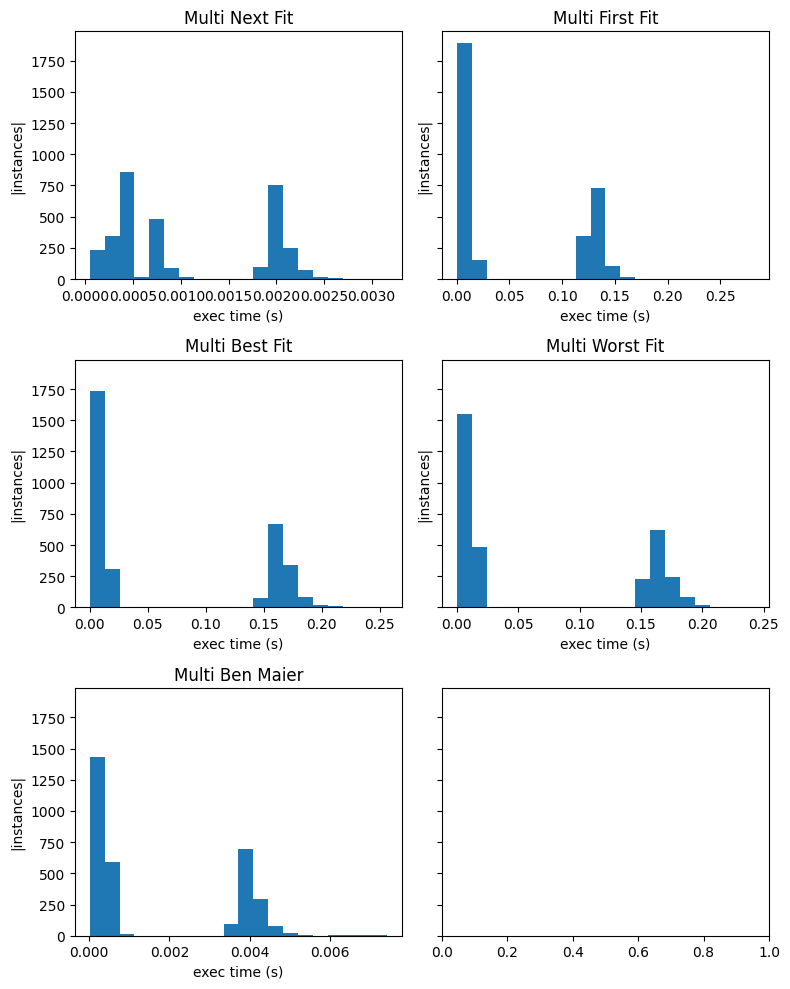

In [99]:
fig, axes = plt.subplots(3,2, sharex = False, sharey= True)
draw_hist(Multi_Next_Fit, "Multi Next Fit", axes[0, 0]) 
draw_hist(Multi_First_Fit, "Multi First Fit", axes[0, 1]) 
draw_hist(Multi_Best_Fit, "Multi Best Fit", axes[1, 0])
draw_hist(Multi_Worst_Fit, "Multi Worst Fit", axes[1, 1])
draw_hist(Multi_Baseline, "Multi Ben Maier", axes[2, 0])
fig.set_size_inches(8,10)
fig.tight_layout()
fig.savefig('outputs/histogram_Multiway.pdf')

In [100]:
def plot_box(values: list[float], names: str, canvas):
    canvas.boxplot(values, notch=True, labels=names)

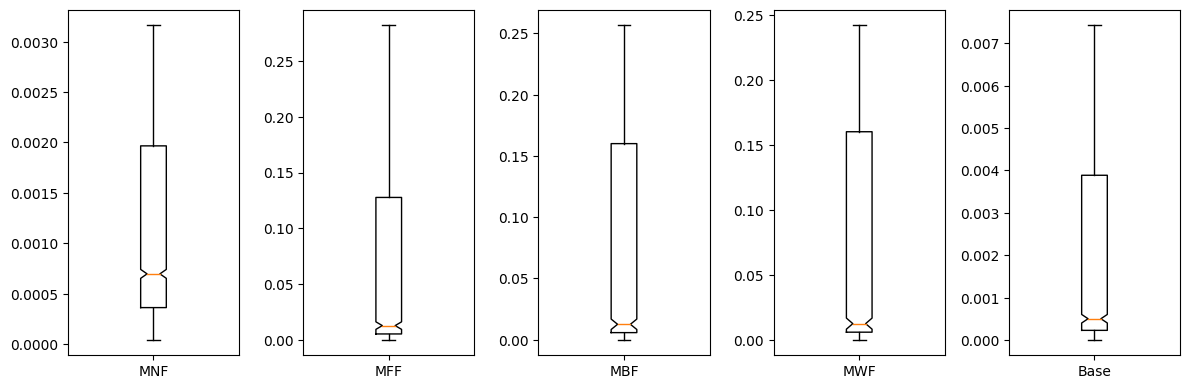

In [101]:
fig, ax = plt.subplots(1,5)

plot_box([Multi_Next_Fit],['MNF'], ax[0])
plot_box([Multi_First_Fit],['MFF'], ax[1])
plot_box([Multi_Best_Fit],['MBF'], ax[2])
plot_box([Multi_Worst_Fit],['MWF'], ax[3])
plot_box([Multi_Baseline],['Base'], ax[4])

fig.set_size_inches(12,4)
fig.tight_layout()
fig.savefig('outputs/boxplot_multi.pdf')

#### KPIs

Of the 3 KPIs that were outlines in T2, only 2 can be reused, namely the number of comparisons and the weight distribution of bins. It is not possible to reuse the KPI measuring wasted space as that is not in fact an issue in multiway binpacking mainly because there is no actual capacity.

Number of comparisons can easily be reused though it does require a slight modifictaion of the multiway algorithms in order to access the values.  

Weight distribution is in fact an excellent KPI for this type of problem as it directly measures if the algorithm is in fact doing what it is suppose to do: distribute weights! This KPI requires no additional rework and can be used just like how it it used for classical binpacking.

In [15]:
count: int = strategy.counting_compares()
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')
print(f'Number of comparisons: {count}\n')

nb_bins = 15
[[21060], [22432, 20997, 20837, 20813, 20693, 20693, 20686, 20677, 20676, 20664, 20663, 20634, 20616, 20570, 20566, 20496, 20441, 20307, 20226], [23895, 22415, 22338, 22134, 22081, 22014, 21950, 21948, 21796, 21784, 21727, 21722, 21557, 21498, 21480, 21315, 21193, 21127], [25273, 23837, 23795, 23774, 23663, 23621, 23502, 23453, 23430, 23366, 23178, 23090, 22991, 22942, 22743, 22442], [26192, 25142, 24852, 24846, 24658, 24592, 24564, 24463, 24457, 24374, 24359, 24332, 23987, 23956, 23952, 23932], [27284, 26181, 26158, 26133, 26067, 25906, 25759, 25698, 25688, 25652, 25615, 25530, 25528, 25366, 25324], [28225, 27180, 26935, 26881, 26867, 26795, 26703, 26651, 26550, 26432, 26375, 26368, 26244, 26204, 20114], [29063, 28160, 28094, 28040, 28020, 27901, 27775, 27765, 27688, 27439, 27425, 27394, 27365, 27349], [29856, 29041, 29038, 28977, 28946, 28921, 28910, 28842, 28703, 28360, 28350, 28305, 28302], [30683, 29783, 29697, 29438, 29427, 29301, 29174, 29173, 29123, 29117, 29116, 2

Weight Distribution: [99952, 99984, 99907, 99939, 99985, 99822, 99956, 99980, 99955, 99965, 99203, 97973, 96495, 95459, 94755, 93196, 92118, 91231, 90285, 89688, 89021, 88258, 87667, 87362, 87195, 86930, 86522, 85565, 84745, 84362, 83634, 82765, 82402, 81509, 80946, 80082, 99942, 99955, 99850, 99982, 99895, 99994, 99963, 99985, 99087, 97911, 96297, 95393, 94280, 92774, 90551, 88786, 87367, 85967, 84204, 83116, 82654, 82253, 60956, 20307]



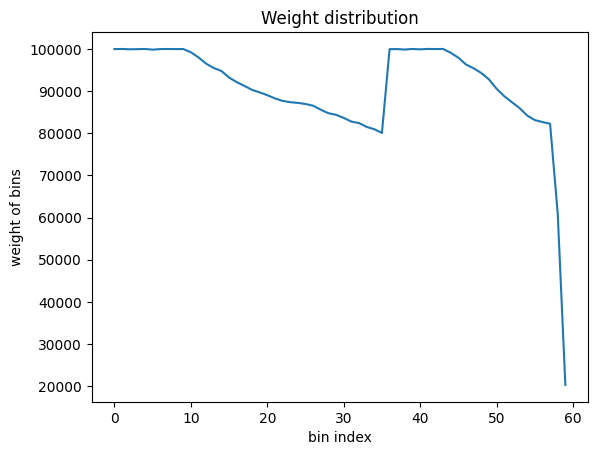

In [21]:
weight_distribution(result)

#### Analysis

For this benchmark the same data was used to allow a proper comparison between both sets of algorithms (binpp/N4C2W2, binpp/N2C3W4, binpp-hard and jburkardt dataset directories).

All the multiway algorithms are implemented using binary search as inspiration, and their counterpart offline algorithms. This isn't actually binary search however, and each algorithm must run exactly a constant number *k* of iterations during the refinement process. This means that the time complexity of each of these algorithms is that of the offline algorithms run k + 1 times which explains the increase in execution time. 



## Self-reflection questions

As part of the self-reflection dimension of an experiential course, each member of the group is expected to answer to the following four questions:

##### *Hassan*
  - What process did you go through to produce this result? (Backward)
  - What were your standards for this piece of work? Did you meet your standards? (Inward)
  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)

##### *Sevhena*
  - What process did you go through to produce this result? (Backward)
  - What were your standards for this piece of work? Did you meet your standards? (Inward)
  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)